In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_wine
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA
import warnings
import pandas as pd
import time
warnings.simplefilter(action='ignore')

## Some usefull methods

In [2]:
def plotDiffSVM(svms, X, y, C, message, X_plot, y_plot):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    plt.figure(figsize=(14, 7), dpi=90)
    
    for i, clf in enumerate(svms):
        if len(svms) != 1:
            plt.subplot(2, 4, i + 1)
            plt.subplots_adjust(wspace=0.8, hspace=0.4)
        else:
            plt.figure(figsize=(10, 5));

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Put the result into a color plot
        
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        
        # Plot also the training points
        plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=plt.cm.coolwarm, edgecolor = "k", s=20)
        plt.xlabel('alcohol')
        plt.ylabel('malic_acid')
        plt.title(f"{message} {C[i]}")
    plt.show();

## Load dataset

In [3]:
data = load_wine()

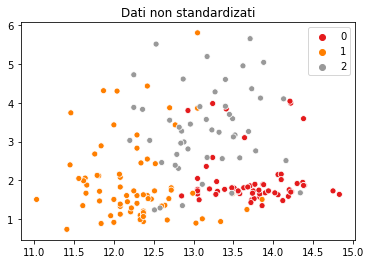

In [4]:
X = data["data"]
X = X[:, :2]
y = data["target"]
sns.scatterplot(X[:, 0], X[:, 1], hue = y, palette="Set1").set_title("Dati non standardizati");

In [91]:
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.33, random_state=1)

In [92]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)

X_t = ss.fit_transform(X_t)
X_test = ss.transform(X_test)


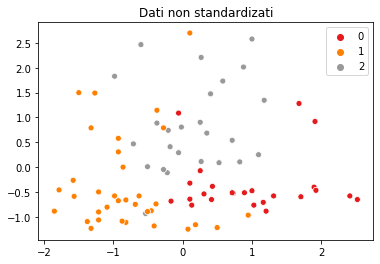

In [93]:
sns.scatterplot(X_train[:, 0], X_train[:, 1], hue = y_train, palette="Set1").set_title("Dati non standardizati");

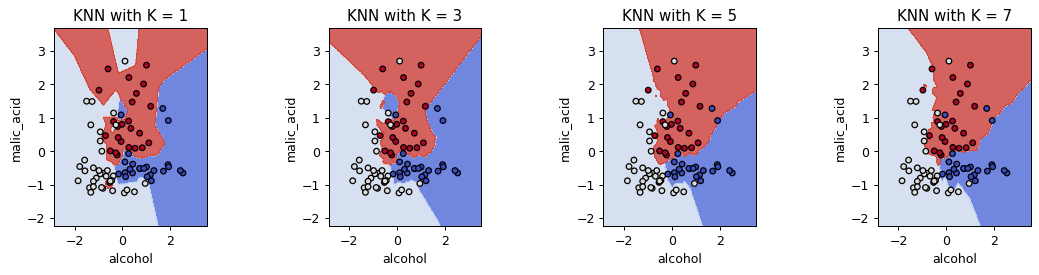

In [94]:
n_n = [1,3,5,7]
knns = []
acc_k = []
for val in n_n:
    knn = neighbors.KNeighborsClassifier(n_neighbors = val)
    knn.fit(X_train, y_train)
    knns.append(knn)
    y_pred_val = knn.predict(X_val)
    acc_k.append(accuracy_score(y_val, y_pred_val)) 
    
plotDiffSVM(knns, X_train, y_train, n_n, "KNN with K =", X_train, y_train)

##  KNN accuracy on the validation set

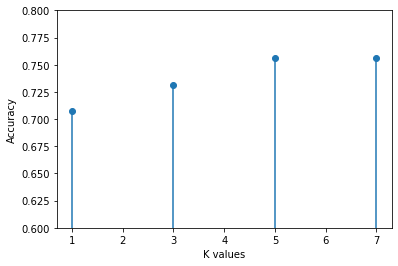

In [100]:
plt.stem(n_n, acc_k);
plt.ylim(0.6, 0.8)
plt.xlabel('K values');
plt.ylabel('Accuracy');

## Test our best model on the test set

In [65]:
k_best = n_n[np.argmax(acc_k)]
knn = neighbors.KNeighborsClassifier(n_neighbors = k_best)
knn.fit(X_t, y_t)
y_pred_test = knn.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8333333333333334

<Figure size 1260x630 with 0 Axes>

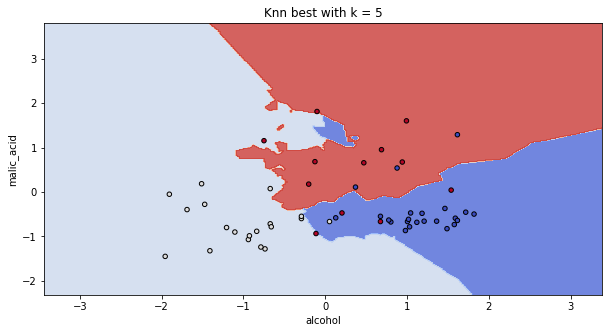

In [66]:
plotDiffSVM([knn], X_t, y_t, [k_best], "Knn best with k =", X_test, y_test)

## Let's try now with LINEARSVC

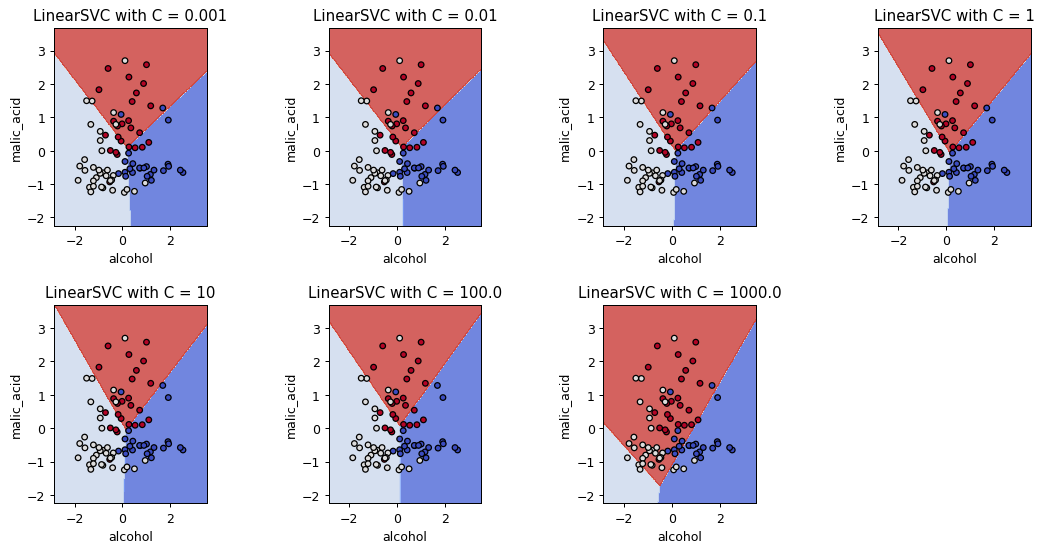

In [102]:
C = [1e-3, 1e-2, 1e-1, 1, 10, 1e+2, 1e+3]
svcs = []
acc_s = []
for val in C:
    svc = LinearSVC(C = val, random_state=0)
    svc.fit(X_train, y_train)
    svcs.append(svc)
    y_pred_val = svc.predict(X_val)
    acc_s.append(accuracy_score(y_val, y_pred_val)) 
    
plotDiffSVM(svcs, X_train, y_train, C,"LinearSVC with C =", X_train, y_train)

In [103]:
#plt.stem(np.log10(C), acc_s, "b");
#plt.xlabel('LOG_10(C)');
#plt.ylabel('Accurancy');
#plt.ylim(0.4, 0.8);

data = {'LOG_10(C)' : np.log10(C), 'Accuracy' : acc_s}
df = pd.DataFrame(data)
df

,LOG_10(C),Accuracy
0,-3.0,0.731707
1,-2.0,0.731707
2,-1.0,0.731707
3,0.0,0.731707
4,1.0,0.731707
5,2.0,0.682927
6,3.0,0.487805


## Try with our best model

In [69]:
c_best = C[np.argmax(acc_s)]
svc = LinearSVC(C = c_best, random_state=0)
svc.fit(X_t, y_t)
y_pred_test = svc.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8518518518518519

<Figure size 1260x630 with 0 Axes>

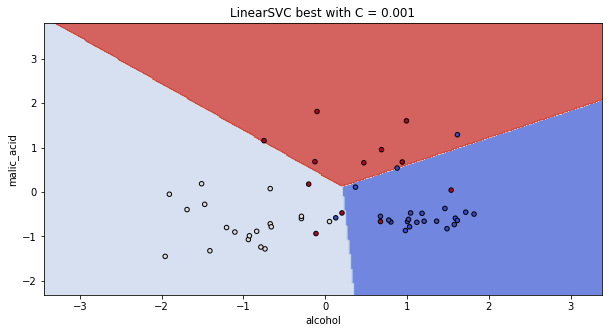

In [70]:
plotDiffSVM([svc], X_t, y_t, [c_best], "LinearSVC best with C =", X_test, y_test)

## Now it's time of RBF kernel

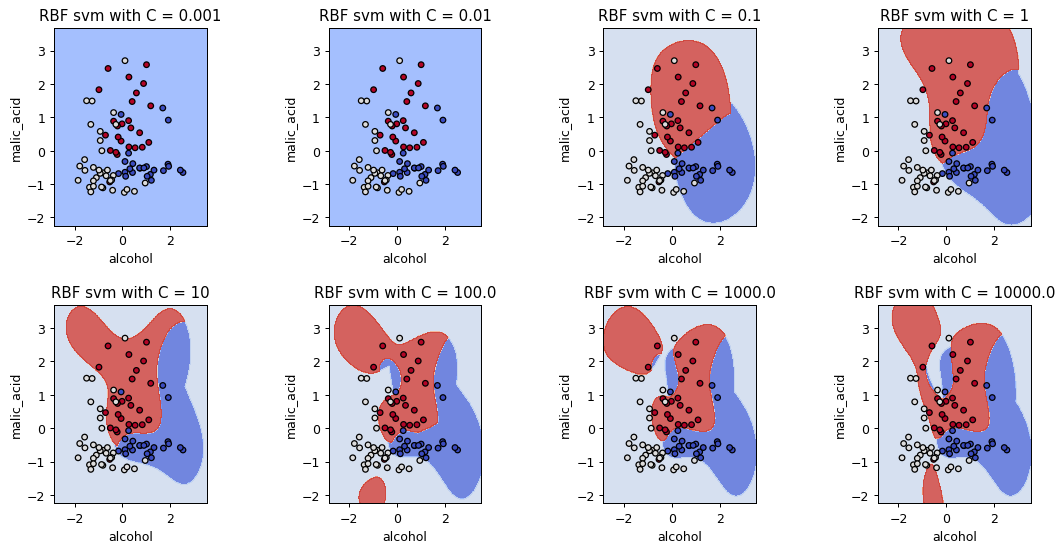

In [104]:
C = [1e-3, 1e-2, 1e-1, 1, 10, 1e+2, 1e+3, 1e+4]
svms = []
acc_r = []
for val in C:
    svc = SVC(C = val, random_state=0)
    svc.fit(X_train, y_train)
    svms.append(svc)
    y_pred_val = svc.predict(X_val)
    acc_r.append(accuracy_score(y_val, y_pred_val)) 
    
plotDiffSVM(svms, X_train, y_train, C, "RBF svm with C =", X_train, y_train)

,LOG_10(C),Accuracy
0,-3.0,0.439024
1,-2.0,0.439024
2,-1.0,0.731707
3,0.0,0.756098
4,1.0,0.707317
5,2.0,0.731707
6,3.0,0.731707
7,4.0,0.756098


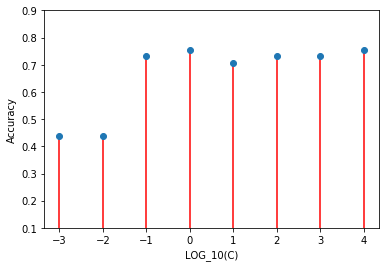

In [105]:
plt.stem(np.log10(C), acc_r, "r");
plt.xlabel('LOG_10(C)');
plt.ylabel('Accuracy');
plt.ylim(0.1, 0.9);

data = {'LOG_10(C)' : np.log10(C), 'Accuracy' : acc_r}
df = pd.DataFrame(data)
df

In [73]:
c_best = C[np.argmax(acc_r)]
svc = SVC(C = c_best, random_state=0)
svc.fit(X_t, y_t)
y_pred_test = svc.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8333333333333334

## Punto 15

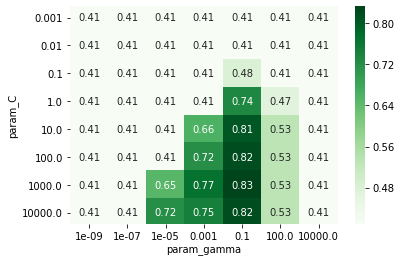

In [85]:
gamma = [1e-9, 1e-7, 1e-5, 1e-3, 0.1, 1e+2, 1e+4]
param_grid = [
  {'C': C, 'gamma': gamma},
 ]
clf = GridSearchCV(SVC(), param_grid)
clf.fit(X_train, y_train)
best = clf.best_params_
pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_), values='mean_test_score', index='param_C', columns='param_gamma')
ax = sns.heatmap(pvt, cmap="Greens", annot = True)
bottom, top = ax.get_ylim()
ris = ax.set_ylim(bottom + 0.4, top - 0.4)

In [86]:
pvt

param_gamma,1.000000e-09,1.000000e-07,1.000000e-05,1.000000e-03,1.000000e-01,1.000000e+02,1.000000e+04
param_C,,,,,,,
0.001,0.409559,0.409559,0.409559,0.409559,0.409559,0.409559,0.409559
0.010,0.409559,0.409559,0.409559,0.409559,0.409559,0.409559,0.409559
0.100,0.409559,0.409559,0.409559,0.409559,0.482353,0.409559,0.409559
1.000,0.409559,0.409559,0.409559,0.409559,0.735294,0.469853,0.409559
10.000,0.409559,0.409559,0.409559,0.662500,0.808088,0.530882,0.409559
100.000,0.409559,0.409559,0.409559,0.722059,0.819853,0.530882,0.409559
1000.000,0.409559,0.409559,0.650735,0.770588,0.833088,0.530882,0.409559
10000.000,0.409559,0.409559,0.722059,0.747059,0.820588,0.530882,0.409559


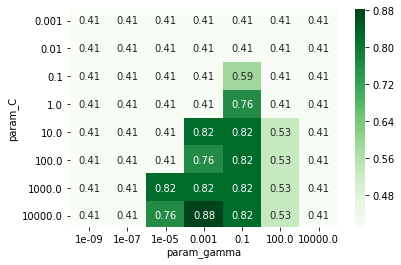

In [76]:
pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_), values='split0_test_score', index='param_C', columns='param_gamma')
ax = sns.heatmap(pvt, cmap="Greens", annot = True)
bottom, top = ax.get_ylim()
ris = ax.set_ylim(bottom + 0.4, top - 0.4)

0.7317073170731707


<Figure size 1260x630 with 0 Axes>

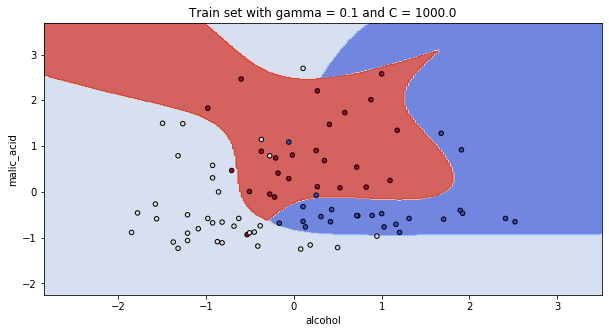

In [20]:
clf = SVC(C = best['C'], gamma = best['gamma'])
clf.fit(X_train, y_train)
y_pred_val = clf.predict(X_val)
print(accuracy_score(y_val, y_pred_val))
plotDiffSVM([clf], X_train, y_train, [best['C']], f"Train set with gamma = {best['gamma']} and C =", X_train, y_train)

0.8333333333333334


<Figure size 1260x630 with 0 Axes>

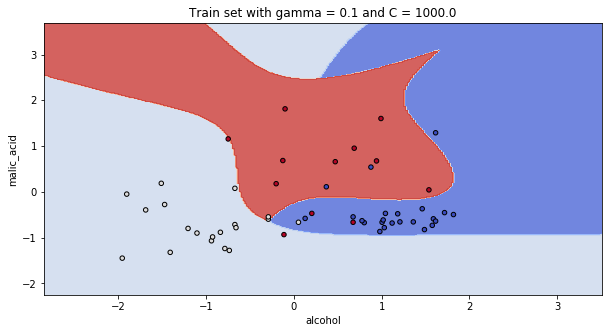

In [21]:
clf = SVC(C = best['C'], gamma = best['gamma'])
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
plotDiffSVM([clf], X_train, y_train, [best['C']], f"Train set with gamma = {best['gamma']} and C =", X_test, y_test)

## Punto 16

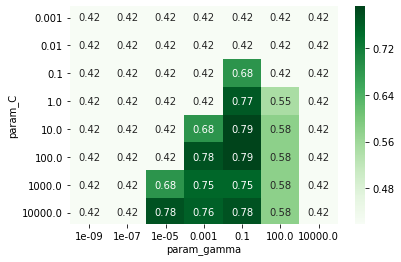

In [22]:
param_grid = [
  {'C': C, 'gamma': gamma},
 ]
clf = GridSearchCV(SVC(), param_grid, cv=10)
clf.fit(X_t, y_t)
best = clf.best_params_
pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_), values='mean_test_score', index='param_C', columns='param_gamma')
ax = sns.heatmap(pvt, cmap="Greens", annot = True)
bottom, top = ax.get_ylim()
ris = ax.set_ylim(bottom + 0.4, top - 0.4)

0.8333333333333334


<Figure size 1260x630 with 0 Axes>

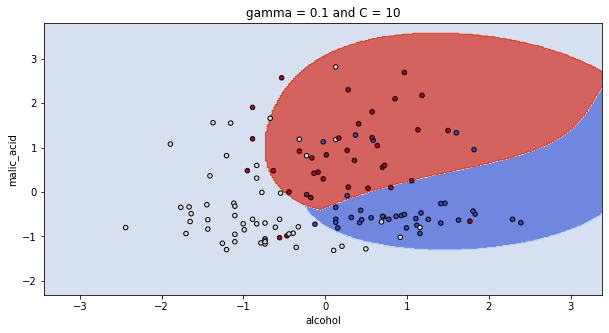

In [23]:
clf = SVC(C = best['C'], gamma = best['gamma'])
clf.fit(X_t, y_t)
y_pred_test = clf.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
plotDiffSVM([clf], X_t, y_t, [best['C']], f"gamma = {best['gamma']} and C =", X_t, y_t)

<Figure size 1260x630 with 0 Axes>

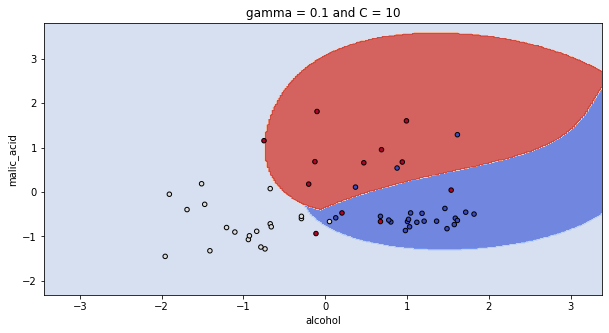

In [24]:
plotDiffSVM([clf], X_t, y_t, [best['C']], f"gamma = {best['gamma']} and C =", X_test, y_test)

## Punto 20

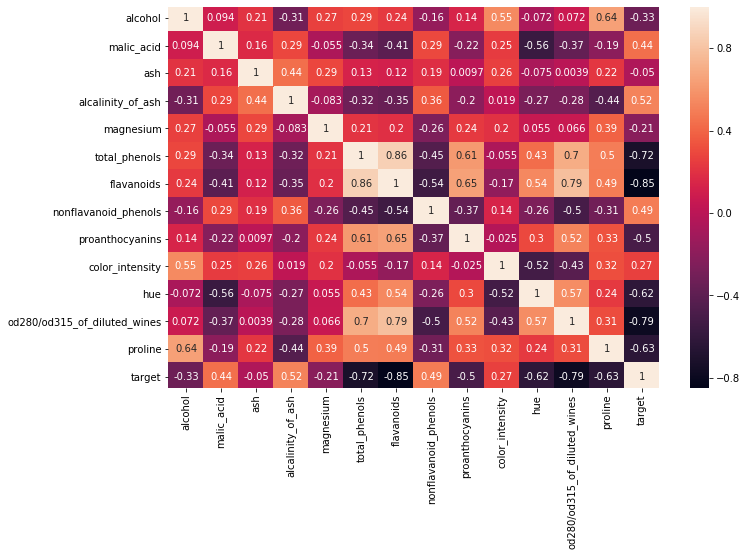

In [25]:
ds = pd.DataFrame(data=data["data"], columns=data["feature_names"])
ds["target"] = data["target"]
plt.figure(figsize=(11, 7));
ax = sns.heatmap(ds.corr(), 
        xticklabels=ds.corr().columns,
        yticklabels=ds.corr().columns,
        annot = True)
bottom, top = ax.get_ylim()
ris = ax.set_ylim(bottom + 0.4, top - 0.4)

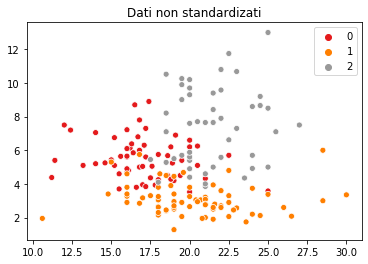

In [26]:
X_new = ds[["alcalinity_of_ash", "color_intensity"]].values
y_new = ds["target"]

sns.scatterplot(X_new[:, 0], X_new[:, 1], hue = y, palette="Set1").set_title("Dati non standardizati");

In [27]:
X_t, X_test, y_t, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.33, random_state=1)

In [28]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)

X_t = ss.fit_transform(X_t)
X_test = ss.transform(X_test)

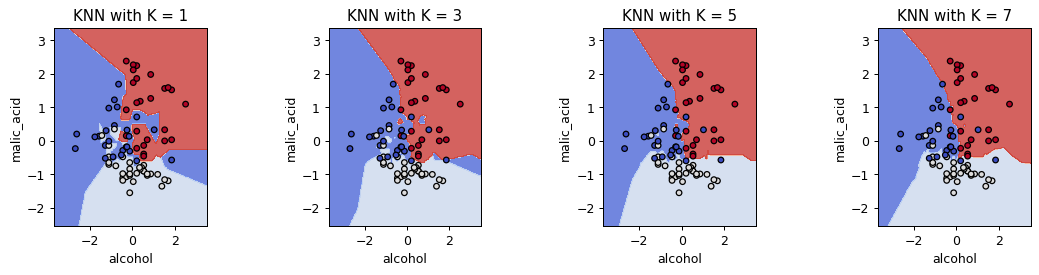

In [29]:
knns = []
acc_k = []
for val in n_n:
    knn = neighbors.KNeighborsClassifier(n_neighbors = val)
    knn.fit(X_train, y_train)
    knns.append(knn)
    y_pred_val = knn.predict(X_val)
    acc_k.append(accuracy_score(y_val, y_pred_val)) 
    
plotDiffSVM(knns, X_train, y_train, n_n, "KNN with K =", X_train, y_train)

In [30]:
k_best = n_n[np.argmax(acc_k)]
knn = neighbors.KNeighborsClassifier(n_neighbors = k_best)
knn.fit(X_t, y_t)
y_pred_test = knn.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.7962962962962963

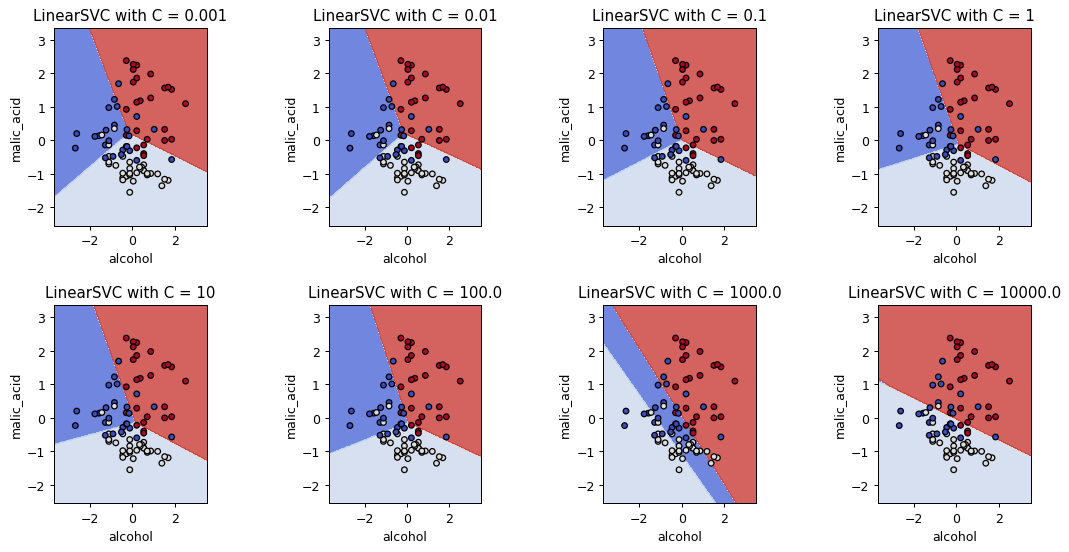

In [31]:
svcs = []
acc_s = []
for val in C:
    svc = LinearSVC(C = val, random_state=0)
    svc.fit(X_train, y_train)
    svcs.append(svc)
    y_pred_val = svc.predict(X_val)
    acc_s.append(accuracy_score(y_val, y_pred_val)) 
    
plotDiffSVM(svcs, X_train, y_train, C,"LinearSVC with C =", X_train, y_train)

In [32]:
c_best = C[np.argmax(acc_s)]
svc = LinearSVC(C = c_best, random_state=0)
svc.fit(X_t, y_t)
y_pred_test = svc.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8333333333333334

In [33]:
param_grid = [
  {'C': C, 'gamma': gamma},
 ]
clf = GridSearchCV(SVC(), param_grid)
clf.fit(X_t, y_t)
best = clf.best_params_

0.9074074074074074


<Figure size 1260x630 with 0 Axes>

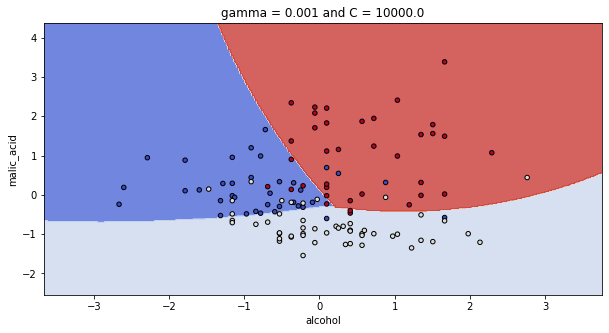

In [34]:
clf = SVC(C = best['C'], gamma = best['gamma'])
clf.fit(X_t, y_t)
y_pred_test = clf.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
plotDiffSVM([clf], X_t, y_t, [best['C']], f"gamma = {best['gamma']} and C =", X_t, y_t)

## PCA

In [44]:
X = data["data"]
ss = StandardScaler()
X = ss.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [45]:
X_t_pca, X_test_pca, y_t, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=1)
X_train_pca, X_val_pca, y_train, y_val = train_test_split(X_t_pca, y_t, test_size=0.33, random_state=1)

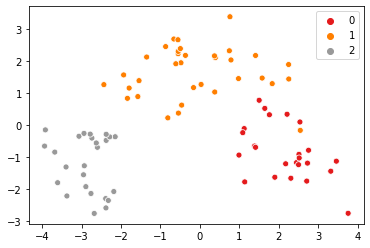

In [46]:
sns.scatterplot(X_train_pca[:, 0], X_train_pca[:, 1], hue = y_train, palette="Set1");

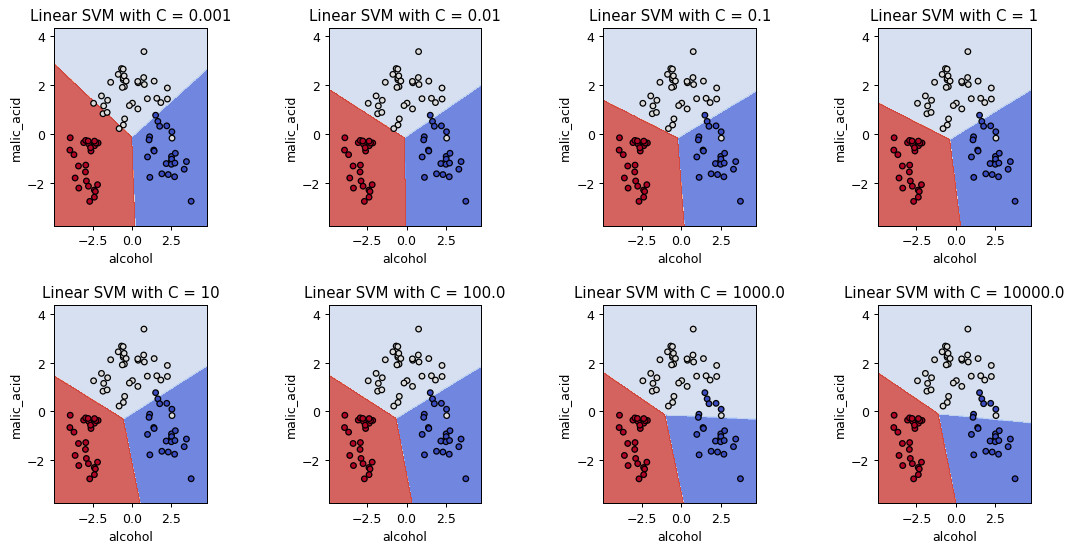

In [47]:
svms = []
acc_s = []
for val in C:
    svm = LinearSVC(C = val, random_state=0)
    svm.fit(X_train_pca, y_train)
    svms.append(svm)
    y_pred_val = svm.predict(X_val_pca)
    acc_s.append(accuracy_score(y_val, y_pred_val)) 
    
plotDiffSVM(svms, X_train_pca, y_train, C,"Linear SVM with C =", X_train_pca, y_train)

In [48]:
c_best = C[np.argmax(acc_s)]
svm = LinearSVC(C = c_best, random_state=0)
svm.fit(X_t_pca, y_t)
y_pred_test_pca = svm.predict(X_test_pca)
accuracy_score(y_test, y_pred_test_pca)

0.9814814814814815

<Figure size 1260x630 with 0 Axes>

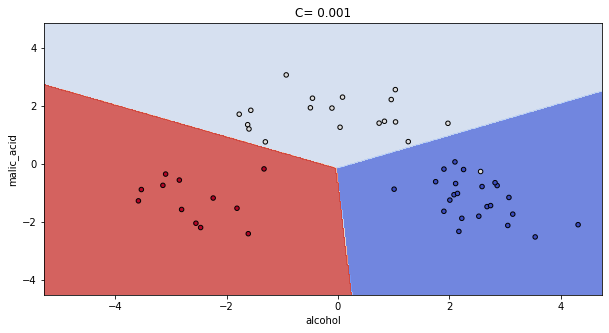

In [49]:
plotDiffSVM([svm], X_t_pca, y_t, [c_best], f"C=", X_test_pca, y_test)

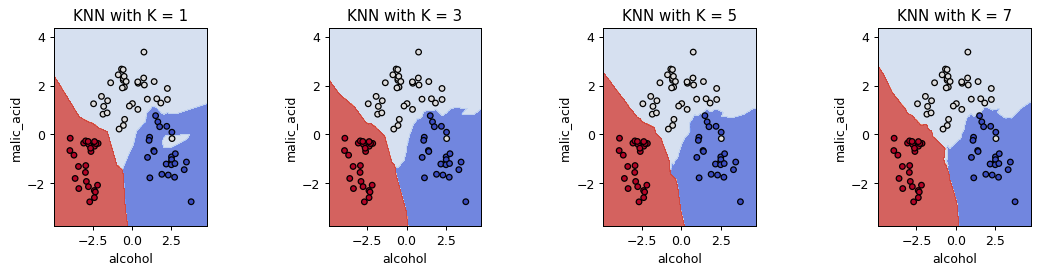

In [50]:
knns = []
acc_k = []
for val in n_n:
    knn = neighbors.KNeighborsClassifier(n_neighbors = val)
    knn.fit(X_train_pca, y_train)
    knns.append(knn)
    y_pred_val = knn.predict(X_val_pca)
    acc_k.append(accuracy_score(y_val, y_pred_val)) 
    
plotDiffSVM(knns, X_train_pca, y_train, n_n, "KNN with K =", X_train_pca, y_train)

In [51]:
t1 = time.time()
k_best = n_n[np.argmax(acc_k)]
knn = neighbors.KNeighborsClassifier(n_neighbors = k_best)
knn.fit(X_t_pca, y_t)
y_pred_test_pca = knn.predict(X_test_pca)
t2 = time.time()
print(accuracy_score(y_test, y_pred_test_pca))
print(t2-t1)

0.9629629629629629
0.004037380218505859


<Figure size 1260x630 with 0 Axes>

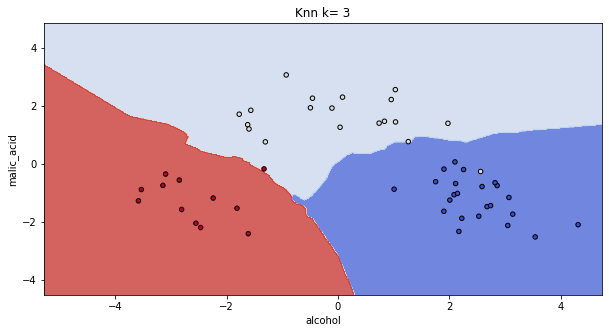

In [52]:
plotDiffSVM([knn], X_t_pca, y_t, [k_best], f"Knn k=", X_test_pca, y_test)

In [53]:
decision_function_shape = ["ovo", "ovr"]
max_iter = [-1, 1e-2, 1e-3, 1e-4]
param_grid = [
  {'C': C, 'gamma': gamma, "decision_function_shape":decision_function_shape, "max_iter":max_iter},
 ]
clf = GridSearchCV(SVC(), param_grid)
clf.fit(X_t_pca, y_t)
best = clf.best_params_

0.9629629629629629
0.0014042854309082031


<Figure size 1260x630 with 0 Axes>

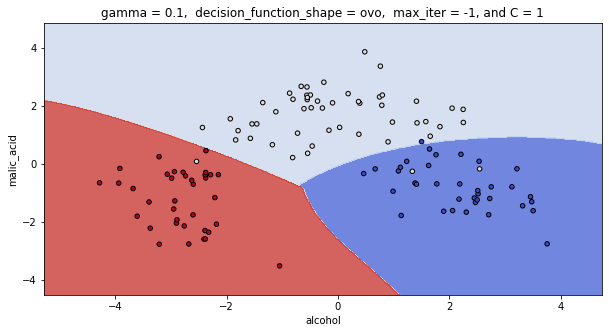

In [54]:
t1 = time.time()
clf = SVC(C = best['C'], gamma = best['gamma'], decision_function_shape = best["decision_function_shape"], max_iter = best["max_iter"])
clf.fit(X_t_pca, y_t)
y_pred_test = clf.predict(X_test_pca)
t2 = time.time()
print(accuracy_score(y_test, y_pred_test))
print(t2-t1)
plotDiffSVM([clf], X_t_pca, y_t, [best['C']], f"gamma = {best['gamma']},  decision_function_shape = {best['decision_function_shape']},  max_iter = {best['max_iter']}, and C =", X_t_pca, y_t)